In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 16.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import json
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
import contractions
import spacy
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


def data_pre(input_data):
    punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    
    with open(input_data, "r", encoding="utf-8") as f:
        d = json.load(f)

    metadata = ['article_url', 'comment_count']
    df = pd.json_normalize(d['articles'], 'comments', metadata)

    data = df.loc[:,['commentID','userID','commentBody','approveDate','recommendations',
                     'replyCount','editorsSelection','article_url','comment_count']]
    
    expanded_text = data['commentBody'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
    data['commentBody'] = expanded_text
    data["commentBody"] = data["commentBody"].str.lower().str.translate(str.maketrans("", "", punc))

    splits = df['article_url'].str.split("/")
    dates = splits.str[-5] + "/" + splits.str[-4] + "/" + splits.str[-3]
    sections = splits.str[-2]
    titles = [' '.join(j) for j in [i.split('-') for i in [sub[: -5] for sub in splits.str[-1]]]]
    output = pd.DataFrame({"Date": dates, "Section": sections, "Title": titles})
    
    return pd.concat([data, output], axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Concatenating Various Data Files

In [ ]:
data_1=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_1.json')
data_2=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_2.json')
data_3=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_3.json')
data_4=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_4.json')
data_5=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_5.json')
data_6=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_6.json')
data_7=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_7.json')
data_8=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_8.json')
data_9=data_pre('/content/drive/MyDrive/STAT427/2013/02/2_9.json')

data1 = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9], axis=0)

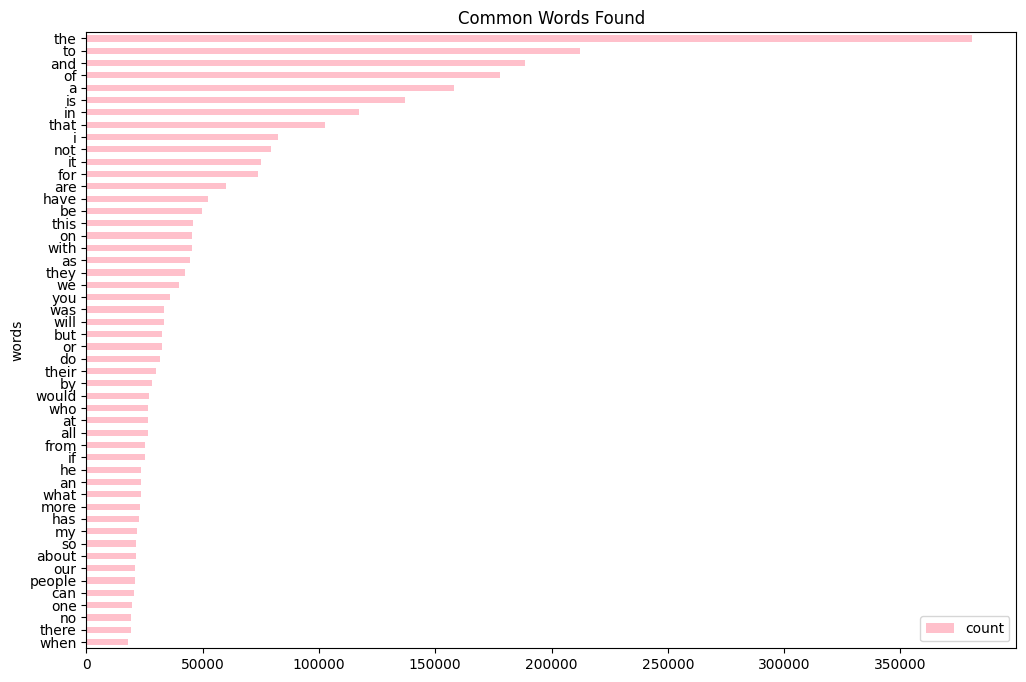

        words  count
0      people  19926
1          us  15648
2        time  11934
3       years  10003
4  government   8915


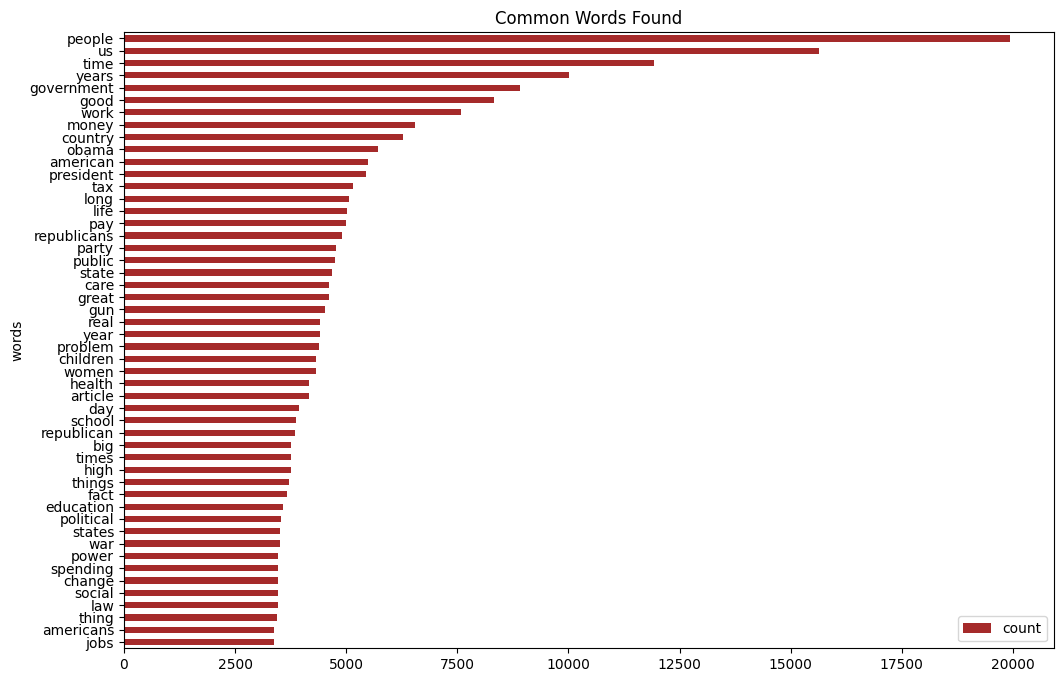

In [ ]:
def clear(string):
    punc = '''!()-[]{};'"\,<>./?@#$%^&*_~'''
    for ele in string:
        if ele in punc:
            string = string.replace(ele, "")
    return string


commentstring='| '.join(data1['commentBody'])
#freq = Counter(commentstring.split()).most_common()
#print(freq)

from collections import Counter
freq = Counter()
for commentstring in commentstring.split():
    freq[commentstring] += 1

#Create a frequency table
import pandas as pd
word_freq = pd.DataFrame(freq.most_common(50),
                             columns=['words', 'count'])
word_freq.head()
#Create the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")
ax.set_title("Common Words Found")
plt.show()

regexp = RegexpTokenizer('\w+')
data1['commentBody']=data1['commentBody'].apply(regexp.tokenize)

stopwords = stopwords.words("english")
my_stopwords=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", 
              "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", 
              "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", 
              "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", 
              "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", 
              "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", 
              "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", 
              "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", 
              "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", 
              "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", 
              "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", 
              "bi", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", 
              "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", 
              "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", 
              "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", 
              "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", 
              "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", 
              "described", "despite", "detail", "df", "di", "did", "didn", "didn't",'didnt', "different", "dj", "dk", "dl", "do", "does", 
              "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", 
              "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", 
              "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", 
              "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", 
              "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", 
              "fifth", "fify", "fill", "find", "first", "five", "fix", "fj", "fl", "fn", "fo", "following", "follows", "for", "former", 
              "formerly", "forth",  "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", 
              "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", 
              "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", 
              "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", 
              "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", 
              "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", 
              "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", 
              "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", 
              "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", 
              "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", 
              "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", 
              "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", 
              "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", 
              "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", 
              "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", 
              "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", 
              "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", 
              "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", 
              "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", 
              "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", 
              "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", 
              "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", 
              "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", 
              "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", 
              "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", 
              "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", 
              "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", 
              "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", 
              "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", 
              "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", 
              "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", 
              "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", 
              "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn",
              "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", 
              "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", 
              "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", 
              "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", 
              "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell",
              "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their",
              "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll",
              "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll",
              "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though",
              "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn",
              "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts",
              "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under",
              "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "use", "used", "useful",
              "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via",
              "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt",
              "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent",
              "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where",
              "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while",
              "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's",
              "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world",
              "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt",
              "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself",
              "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]

stopwords.extend(my_stopwords)
data1["commentBody"] = data1["commentBody"].apply(lambda x: " ".join([word for word in x if word not in stopwords]))




commentstring2='| ,'.join(map(str,data1['commentBody']))
freq2 = Counter(commentstring2.split()).most_common()
#print(freq2)

from collections import Counter
freq2 = Counter()
for commentstring2 in commentstring2.split():
    freq2[commentstring2] += 1

#Create a frequency table
import pandas as pd
word_freq2 = pd.DataFrame(freq2.most_common(50),
                             columns=['words', 'count'])
print(word_freq2.head())
#Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq2.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Words Found")
plt.show()

In [ ]:
len(data1)

79475

In [ ]:
data1.head()

,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title
0,12256848,69564830,museums high quality banks seine area listed h...,1405101444,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,
1,11719921,46672394,picasso musee absolutely closed inexcusably lo...,1399288711,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,
2,11080673,6488302,musee marmottan 16th arrond list loves impress...,1391425682,1,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,
3,11075605,4743890,musée des années trente museum 1930s wonderful...,1391425678,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,
4,11078452,67392677,mention marvellous musée jacquemartandré locat...,1391425673,2,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,


## Creating Single Frequency Word List

In [ ]:
def single_freq(temp_str):   
    str_list = temp_str.split()
    frequency = Counter(str_list)
    single_freq_words =[]
    for word in frequency:
        if frequency[word] == 1:
            single_freq_words.append(word)
    print("The total number of single frequency words are: ",len(single_freq_words))
    #print(single_freq_words)
    return single_freq_words
    
total_words_before_stem = data1['commentBody'].str.cat(sep=' ')
print(type(total_words_before_stem))
print("The total words in the corpus are: ",len(total_words_before_stem.split()))    
single_freq_words = single_freq(total_words_before_stem)

<class 'str'>
The total words in the corpus are:  173080
The total number of single frequency words are:  9379


## Removing Single Frequency Words

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas(desc = "Processing Rows")
#data1["commentBody_processed"] = data1["commentBody"].progress_apply(lambda x: " ".join([word for word in x.split() if word not in single_freq_words]))
data1["commentBody_processed"] = data1["commentBody"]
data1.head()

,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,12256848,69564830,museums high quality banks seine area listed h...,1405101444,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,museums high quality banks seine area listed h...
1,11719921,46672394,picasso musee absolutely closed inexcusably lo...,1399288711,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,picasso musee absolutely closed inexcusably lo...
2,11080673,6488302,musee marmottan 16th arrond list loves impress...,1391425682,1,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,musee marmottan 16th arrond list loves impress...
3,11075605,4743890,musée des années trente museum 1930s wonderful...,1391425678,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,musée des années trente museum 1930s wonderful...
4,11078452,67392677,mention marvellous musée jacquemartandré locat...,1391425673,2,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,mention marvellous musée jacquemartandré locat...


In [ ]:

total_words_before_stem = data1['commentBody_processed'].str.cat(sep=' ')
print(type(total_words_before_stem))
print("The total words in the corpus after single word removal are: ",len(total_words_before_stem.split()))    
single_freq_words = single_freq(total_words_before_stem)

<class 'str'>
The total words in the corpus after single word removal are:  173080
The total number of single frequency words are:  9379


## Stemming the Comment_Body

In [ ]:
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import WhitespaceTokenizer

englishStemmer=SnowballStemmer("english")
w_tokenizer = WhitespaceTokenizer()

data1['commentBody_processed'] = data1['commentBody_processed'].progress_apply(lambda x: [englishStemmer.stem(w) for w in w_tokenizer.tokenize(x)])
detokenizer = TreebankWordDetokenizer()
data1['commentBody_processed'] = data1['commentBody_processed'].progress_apply(lambda x: [detokenizer.detokenize(list(x))])
data1['commentBody_processed'] = data1['commentBody_processed'].str[0]
data1.head()


Processing Rows:   0%|          | 0/5177 [00:00<?, ?it/s]

Processing Rows:   0%|          | 0/5177 [00:00<?, ?it/s]

,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,12256848,69564830,museums high quality banks seine area listed h...,1405101444,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,museum high qualiti bank sein area list herita...
1,11719921,46672394,picasso musee absolutely closed inexcusably lo...,1399288711,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,picasso muse absolut close inexcus long time m...
2,11080673,6488302,musee marmottan 16th arrond list loves impress...,1391425682,1,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,muse marmottan 16th arrond list love impressio...
3,11075605,4743890,musée des années trente museum 1930s wonderful...,1391425678,0,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,musé des anné trent museum 1930s wonder instit...
4,11078452,67392677,mention marvellous musée jacquemartandré locat...,1391425673,2,0,False,https://tmagazine.blogs.nytimes.com/2014/01/31...,0,2014/01/31,letter-from-france-how-to-visit-some-of-pariss...,,mention marvel musé jacquemartandré locat 158 ...


In [ ]:
total_words_after_stem = data1['commentBody_processed'].str.cat(sep=' ')
print(type(total_words_after_stem))
print("The total words in the corpus after single word removal and stemming are: ",len(total_words_after_stem.split()))

<class 'str'>
The total words in the corpus after single word removal and stemming are:  173080


## Create 3 different dataframes for C, V and VC.

In [ ]:
# The 3 different wordlists
vaccine_wordlist = ["booster","antibody","antigen","epidemic","herd immunity","injection","pcr","vax",
                    "jab","vaccine","immunity"]

covid_wordlist = ["Covid","corona","alpha","beta","gamma","delta","omicron","quarantine","pandemic","lockdown",
                  "herd immunity","CoV-2","n95","cov19","antibody","antigen","pcr","antiviral","comorbidity",
                  "myocarditis","shutdown","epidemic","face mask","ventilator" ,"community spread","symptomatic"]

common_wordlist = ["antibody","epidemic","herd immunity","pcr"]

In [ ]:
# Stemmed wordlists
st_vaccine_wordlist = [englishStemmer.stem(word) for word in vaccine_wordlist]
print(st_vaccine_wordlist)

st_covid_wordlist = [englishStemmer.stem(word) for word in covid_wordlist]
print(st_covid_wordlist)

st_common_wordlist = [englishStemmer.stem(word) for word in common_wordlist]
print(st_common_wordlist)

['booster', 'antibodi', 'antigen', 'epidem', 'herd immun', 'inject', 'pcr', 'vax', 'jab', 'vaccin', 'immun']
['covid', 'corona', 'alpha', 'beta', 'gamma', 'delta', 'omicron', 'quarantin', 'pandem', 'lockdown', 'herd immun', 'cov-2', 'n95', 'cov19', 'antibodi', 'antigen', 'pcr', 'antivir', 'comorbid', 'myocard', 'shutdown', 'epidem', 'face mask', 'ventil', 'community spread', 'symptomat']
['antibodi', 'epidem', 'herd immun', 'pcr']


#### Vaccine_Data


In [ ]:

data_vaccine = data1[data1['commentBody_processed'].str.contains('|'.join(st_vaccine_wordlist))].reset_index(drop=True)
print("The number of rows in vaccine data is",len(data_vaccine))
data_vaccine.head()

The number of rows in vaccine data is 31


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,11070837,66555774,waiting bridget kelly start singing working de...,1391257642,72,0,False,https://www.nytimes.com/2014/02/01/opinion/col...,162,2014/02/01,opinion,collins christie plays defense,wait bridget kelli start sing work deal immun ...
1,11070126,64652768,begun hear christie canaries sing sweet songs ...,1391250847,6,0,False,https://www.nytimes.com/2014/02/01/opinion/col...,162,2014/02/01,opinion,collins christie plays defense,begun hear christi canari sing sweet song lawy...
2,11068843,41164687,miles nyc metro san franciscans bridges empath...,1391243910,19,0,False,https://www.nytimes.com/2014/02/01/opinion/col...,162,2014/02/01,opinion,collins christie plays defense,mile nyc metro san franciscan bridg empath nyc...
3,11068416,12335584,bit long prefer term george washington bridgeg...,1391226906,38,7,False,https://www.nytimes.com/2014/02/01/opinion/col...,162,2014/02/01,opinion,collins christie plays defense,bit long prefer term georg washington bridgeg ...
4,11068097,33888832,hope david wildstein granted immunity yous att...,1391215026,440,5,False,https://www.nytimes.com/2014/02/01/opinion/col...,162,2014/02/01,opinion,collins christie plays defense,hope david wildstein grant immun yous attorney...


#### Covid Data


In [ ]:

data_covid = data1[data1['commentBody_processed'].str.contains('|'.join(st_covid_wordlist))].reset_index(drop=True)
print("The number of rows in vaccine data is",len(data_covid))
data_covid.head()

The number of rows in vaccine data is 26


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,11070647,58245197,disagree ideology government spending creates ...,1391254326,10,7,False,https://www.nytimes.com/2014/02/01/opinion/the...,93,2014/02/01,opinion,the economic road ahead,disagre ideolog govern spend creat job hallmar...
1,11070347,56731844,people power alter landscape job creators rest...,1391253833,9,1,False,https://www.nytimes.com/2014/02/01/opinion/the...,93,2014/02/01,opinion,the economic road ahead,peopl power alter landscap job creator rest ti...
2,11067818,59709995,sequester shutdown debt crises unemployment in...,1391241947,6,0,False,https://www.nytimes.com/2014/02/01/opinion/the...,93,2014/02/01,opinion,the economic road ahead,sequest shutdown debt crise unemploy insur rec...
3,11069576,22403264,provided power state constitution chief execut...,1391246946,87,0,False,https://www.nytimes.com/2014/02/01/opinion/col...,162,2014/02/01,opinion,collins christie plays defense,provid power state constitut chief execut us g...
4,11067852,8453442,keeping players numbers straight guys alphabet...,1391240415,38,1,False,https://www.nytimes.com/2014/02/01/opinion/col...,162,2014/02/01,opinion,collins christie plays defense,keep player number straight guy alphabet heigh...


#### Covid + Vaccine Data



In [ ]:
data_cv_1 = data1[data1['commentBody_processed'].str.contains('|'.join(st_common_wordlist))].reset_index(drop=True)
print("The number of rows in common data is",len(data_cv_1))
data_cv_1.head()

The number of rows in common data is 6


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,11147078,4739937,high profile activism tax regulatory authoriti...,1392183897,11,0,False,https://www.nytimes.com/2014/02/12/opinion/ges...,48,2014/02/12,opinion,gessen the checks in the mail,high profil activ tax regulatori author billio...
1,11147078,4739937,high profile activism tax regulatory authoriti...,1392183897,11,0,False,https://www.nytimes.com/2014/02/12/opinion/ges...,48,2014/02/12,opinion,gessen the checks in the mail,high profil activ tax regulatori author billio...
2,11239407,55359661,hrefhttpwwwusatodaycomstorynewsnation20130916m...,1393498625,1,2,False,https://nocera.blogs.nytimes.com/2014/02/26/th...,0,2014/02/26,the-gun-report-february-26-2014,,hrefhttpwwwusatodaycomstorynewsnation20130916m...
3,11243538,67615102,quit change subject epidemic autism older fath...,1393518776,0,1,False,https://www.nytimes.com/2014/02/27/health/ment...,115,2014/02/27,health,mental illness risk higher for children of old...,quit chang subject epidem autism older fathers...
4,11241559,66692651,lifelong soccer fanatic agree heading ball jos...,1393502504,4,0,False,https://www.nytimes.com/2014/02/27/sports/socc...,74,02/27/sports,soccer,researchers find brain trauma disease in a soc...,lifelong soccer fanat agre head ball jostl bra...


In [ ]:
data_cv_2 = data_vaccine[data_vaccine['commentBody_processed'].str.contains('|'.join(st_covid_wordlist))].reset_index(drop=True)
print("The number of rows in v+c data is",len(data_cv_2))
data_cv_2.head()

The number of rows in v+c data is 6


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,11147078,4739937,high profile activism tax regulatory authoriti...,1392183897,11,0,False,https://www.nytimes.com/2014/02/12/opinion/ges...,48,2014/02/12,opinion,gessen the checks in the mail,high profil activ tax regulatori author billio...
1,11147078,4739937,high profile activism tax regulatory authoriti...,1392183897,11,0,False,https://www.nytimes.com/2014/02/12/opinion/ges...,48,2014/02/12,opinion,gessen the checks in the mail,high profil activ tax regulatori author billio...
2,11239407,55359661,hrefhttpwwwusatodaycomstorynewsnation20130916m...,1393498625,1,2,False,https://nocera.blogs.nytimes.com/2014/02/26/th...,0,2014/02/26,the-gun-report-february-26-2014,,hrefhttpwwwusatodaycomstorynewsnation20130916m...
3,11243538,67615102,quit change subject epidemic autism older fath...,1393518776,0,1,False,https://www.nytimes.com/2014/02/27/health/ment...,115,2014/02/27,health,mental illness risk higher for children of old...,quit chang subject epidem autism older fathers...
4,11241559,66692651,lifelong soccer fanatic agree heading ball jos...,1393502504,4,0,False,https://www.nytimes.com/2014/02/27/sports/socc...,74,02/27/sports,soccer,researchers find brain trauma disease in a soc...,lifelong soccer fanat agre head ball jostl bra...


In [ ]:
data_cv = pd.concat([data_cv_1,data_cv_2]).drop_duplicates().reset_index(drop=True)
print("The number of rows in vaccine data is",len(data_cv))
data_cv.head()

The number of rows in vaccine data is 4


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,11147078,4739937,high profile activism tax regulatory authoriti...,1392183897,11,0,False,https://www.nytimes.com/2014/02/12/opinion/ges...,48,2014/02/12,opinion,gessen the checks in the mail,high profil activ tax regulatori author billio...
1,11239407,55359661,hrefhttpwwwusatodaycomstorynewsnation20130916m...,1393498625,1,2,False,https://nocera.blogs.nytimes.com/2014/02/26/th...,0,2014/02/26,the-gun-report-february-26-2014,,hrefhttpwwwusatodaycomstorynewsnation20130916m...
2,11243538,67615102,quit change subject epidemic autism older fath...,1393518776,0,1,False,https://www.nytimes.com/2014/02/27/health/ment...,115,2014/02/27,health,mental illness risk higher for children of old...,quit chang subject epidem autism older fathers...
3,11241559,66692651,lifelong soccer fanatic agree heading ball jos...,1393502504,4,0,False,https://www.nytimes.com/2014/02/27/sports/socc...,74,02/27/sports,soccer,researchers find brain trauma disease in a soc...,lifelong soccer fanat agre head ball jostl bra...


## Topic Modelling for Vaccine Data

In [ ]:
#a_para = ' '.join([i for i in data_vaccine['commentBody_processed']]).split()
#print(a_para)

In [ ]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = data_vaccine.commentBody_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['wait', 'bridget', 'kelli', 'start', 'sing', 'work', 'deal', 'immun', 'type', 'christi', 'spoke', 'gum', 'nice', 'stuck', 'shoe', 'summarili', 'scrape', 'threw', 'bus', 'threw', 'back', 'sting', 'yeah']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1)]


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
#lda_model = gensim.models.LdaModel(corpus=corpus,
#                                       id2word=id2word,
#                                       num_topics=num_topics)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"cold" + 0.029*"immun" + 0.020*"caus" + 0.020*"die" + 0.020*"weaken" '
  '+ 0.020*"flu" + 0.010*"wait" + 0.010*"agre" + 0.010*"smoke" + 0.010*"care"'),
 (1,
  '0.019*"christi" + 0.014*"live" + 0.014*"high" + 0.014*"stoner" + '
  '0.010*"felt" + 0.010*"dog" + 0.010*"grandmoth" + 0.010*"watch" + '
  '0.010*"potenti" + 0.010*"inject"'),
 (2,
  '0.020*"wildstein" + 0.020*"christi" + 0.020*"governor" + 0.011*"immun" + '
  '0.011*"long" + 0.011*"honesti" + 0.011*"involv" + 0.011*"fact" + '
  '0.011*"integr" + 0.011*"prosecut"'),
 (3,
  '0.030*"olymp" + 0.020*"watch" + 0.020*"boycot" + 0.020*"bank" + '
  '0.020*"remot" + 0.010*"high" + 0.010*"inject" + 0.010*"opportun" + '
  '0.010*"aid" + 0.010*"turn"'),
 (4,
  '0.031*"health" + 0.028*"lauren" + 0.021*"year" + 0.021*"pursu" + '
  '0.021*"peru" + 0.021*"insur" + 0.021*"care" + 0.021*"project" + 0.021*"job" '
  '+ 0.014*"depend"'),
 (5,
  '0.042*"pot" + 0.021*"peopl" + 0.017*"smoke" + 0.017*"aw" + 0.013*"time" + '
  '0.013*"man" 

In [ ]:
print(lda_model.get_document_topics(corpus[0]))


[(9, 0.9844341)]


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip3 install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 37.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/STAT427/CodesandOutputs/2014/02/Phoebe_prepared_v_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/STAT427/CodesandOutputs/2014/02/Phoebe_prepared_v_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.264329 -0.054073       1        1  17.722892
6      0.019158  0.247208       2        1  14.854725
5     -0.069258  0.047862       3        1  13.690758
1     -0.100523 -0.058812       4        1  12.183894
3     -0.071826 -0.071489       5        1  10.585636
8     -0.000762 -0.031155       6        1   9.870602
7     -0.031433 -0.052712       7        1   8.447884
9      0.003095 -0.015202       8        1   6.666789
0     -0.001092  0.005258       9        1   3.085061
2     -0.011687 -0.016886      10        1   2.891759, topic_info=          Term      Freq     Total Category  logprob  loglift
651        pot  7.000000  7.000000  Default  30.0000  30.0000
387     health  7.000000  7.000000  Default  29.0000  29.0000
290        pub  6.000000  6.000000  Default  28.0000  28.0000
166      peopl  9.000000  9.000000  Default  27.0000  27.0000
390     lauren  6.000000  6.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
69   wildstein  0.744719  5.002135  Topic10  -3.8935   1.6387
3      christi  0.744474  5.987406  Topic10  -3.8938   1.4586
6        immun  0.391534  8.242446  Topic10  -4.5364   0.4963
103     depend  0.389818  4.065294  Topic10  -4.5408   1.1987
4         deal  0.389704  3.403329  Topic10  -4.5411   1.3762

[439 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
231       5  0.513003      absolut
366       1  0.809232  acaobamacar
232       5  0.513009        activ
305       3  0.609185           ad
305       7  0.304593           ad
...     ...       ...          ...
334       3  0.972389         yack
21        8  0.851632         yeah
414       1  0.570142         year
414       2  0.342085         year
414       8  0.114028         year

[419 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 2, 4, 9, 8, 10, 1, 3])

In [ ]:
topic_weight = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=True, mds='mmds').to_dict()['mdsDat']['Freq']
for i in range(len(topic_weight)):
  print("Topic",i+1,topic_weight[i])

Topic 1 17.72289148625798
Topic 2 14.854725237406532
Topic 3 13.690757944356854
Topic 4 12.183894170756036
Topic 5 10.585636375968049
Topic 6 9.870601929000777
Topic 7 8.447884045989698
Topic 8 6.666788760595968
Topic 9 3.085061304980572
Topic 10 2.891758744687537


In [ ]:
def format_topics_sent(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: x[1], reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_topic', 'Perc_Contrib', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.rename(columns={0: "Text"}, inplace=True)
    return sent_topics_df

def format_topics_sent_gen(ldamodel, corpus, texts):
    for i, row in enumerate(ldamodel[corpus]):
        yield row

row_generator = format_topics_sent_gen(lda_model, corpus, data)
row = next(row_generator)
lda_model.show_topic(9, topn=10)
sent_topics_df = format_topics_sent(lda_model, corpus, data)
sent_topics_df

,Dominant_topic,Perc_Contrib,Topic_Keywords,Text
0,9,0.9844,"born, threw, deal, wait, brother, children, fa...",wait bridget kelli start sing work deal immun ...
1,1,0.9939,"christi, live, high, stoner, felt, dog, grandm...",begun hear christi canari sing sweet song lawy...
2,7,0.9887,"head, determin, player, immun, opportun, bridg...",mile nyc metro san franciscan bridg empath nyc...
3,2,0.9899,"wildstein, christi, governor, immun, long, hon...",bit long prefer term georg washington bridgeg ...
4,8,0.9932,"wildstein, kelli, christi, parent, public, exp...",hope david wildstein grant immun yous attorney...
5,0,0.9858,"cold, immun, caus, die, weaken, flu, wait, agr...",habit specul evid agre invit puddl jump splash...
6,0,0.9512,"cold, immun, caus, die, weaken, flu, wait, agr...",die cold flu cold caus weaken immun
7,0,0.9512,"cold, immun, caus, die, weaken, flu, wait, agr...",die cold flu cold caus weaken immun
8,1,0.9864,"christi, live, high, stoner, felt, dog, grandm...",held sick dog arm vein inject pentobarbit felt...
9,8,0.9894,"wildstein, kelli, christi, parent, public, exp...",kervorkian hero bring issu public medic profes...


## Topic Modelling for Covid Data

In [ ]:
data = data_covid.commentBody_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

['disagre', 'ideolog', 'govern', 'spend', 'creat', 'job', 'hallmark', 'govern', 'spend', 'wast', 'fraud', 'corrupt', 'peopl', 'spend', 'money', 'effici', 'govern', 'latest', 'growth', 'report', 'receiv', 'general', 'warm', 'recept', 'sequest', 'govern', 'shutdown', 'modest', 'slow', 'increas']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 5), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
num_topics = 10
# Build LDA model
#lda_model = gensim.models.LdaModel(corpus=corpus,
#                                       id2word=id2word,
#                                       num_topics=num_topics)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.002*"state" + 0.002*"christi" + 0.001*"citizen" + 0.001*"video" + '
  '0.001*"power" + 0.001*"governor" + 0.001*"gwb" + 0.001*"predecessor" + '
  '0.001*"time" + 0.001*"bulli"'),
 (1,
  '0.034*"nation" + 0.023*"ban" + 0.019*"polit" + 0.015*"republican" + '
  '0.015*"assembl" + 0.011*"peopl" + 0.011*"live" + 0.008*"wear" + '
  '0.008*"presid" + 0.008*"american"'),
 (2,
  '0.023*"patient" + 0.018*"die" + 0.018*"care" + 0.012*"friend" + '
  '0.012*"ventil" + 0.012*"hospic" + 0.012*"death" + 0.012*"life" + '
  '0.012*"huge" + 0.012*"elder"'),
 (3,
  '0.043*"kill" + 0.043*"mass" + 0.029*"peopl" + 0.029*"year" + 0.029*"prior" '
  '+ 0.029*"averag" + 0.015*"incid" + 0.015*"increas" + 0.015*"rate" + '
  '0.015*"trend"'),
 (4,
  '0.024*"incom" + 0.020*"tax" + 0.015*"wealth" + 0.015*"inequ" + '
  '0.015*"philippin" + 0.010*"increas" + 0.010*"year" + 0.010*"shift" + '
  '0.010*"dividend" + 0.010*"wage"'),
 (5,
  '0.029*"spend" + 0.025*"govern" + 0.020*"heart" + 0.015*"order" + '
  '0.01

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/STAT427/CodesandOutputs/2014/02/Phoebe_prepared_c_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/STAT427/CodesandOutputs/2014/02/Phoebe_prepared_c_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.231348  0.128281       1        1  24.354805
1      0.130756  0.121946       2        1  14.844125
6     -0.112864 -0.155968       3        1  12.141637
4      0.043559 -0.043714       4        1  10.219121
5      0.048113 -0.006290       5        1  10.150909
9      0.016709  0.012657       6        1   8.007572
2      0.049142 -0.027859       7        1   7.683195
7      0.049523 -0.003809       8        1   7.269206
3      0.012705 -0.025088       9        1   5.279475
0     -0.006294 -0.000156      10        1   0.049955, topic_info=       Term       Freq      Total Category  logprob  loglift
598   water  12.000000  12.000000  Default  30.0000  30.0000
92   nation   7.000000   7.000000  Default  29.0000  29.0000
607    kill   3.000000   3.000000  Default  28.0000  28.0000
608    mass   3.000000   3.000000  Default  27.0000  27.0000
655    head  10.000000  10.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
31    peopl   0.000940   6.562710  Topic10  -6.5595  -1.2487
88     long   0.000940   1.903907  Topic10  -6.5595  -0.0112
156  denial   0.000940   1.988768  Topic10  -6.5596  -0.0549
12    feder   0.000940   1.822385  Topic10  -6.5603   0.0317
190   press   0.000939   1.758975  Topic10  -6.5607   0.0668

[455 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
348       3  0.511692  absolut
483       7  0.858381   accept
349       3  0.511690    activ
137       3  0.392370      aid
137       6  0.392370      aid
...     ...       ...      ...
54        2  0.226451     year
54        4  0.113226     year
54        5  0.113226     year
54        6  0.113226     year
54        9  0.226451     year

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 7, 5, 6, 10, 3, 8, 4, 1])

In [ ]:
topic_weight = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=True, mds='mmds').to_dict()['mdsDat']['Freq']
for i in range(len(topic_weight)):
  print("Topic",i+1,topic_weight[i])

Topic 1 24.354805371100234
Topic 2 14.844126329694674
Topic 3 12.141637105863339
Topic 4 10.219119597561457
Topic 5 10.150908593152066
Topic 6 8.007572426709315
Topic 7 7.683194495947915
Topic 8 7.269206201372874
Topic 9 5.279475312244276
Topic 10 0.04995456635384772


In [ ]:
def format_topics_sent(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: x[1], reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_topic', 'Perc_Contrib', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.rename(columns={0: "Text"}, inplace=True)
    return sent_topics_df

def format_topics_sent_gen(ldamodel, corpus, texts):
    for i, row in enumerate(ldamodel[corpus]):
        yield row

row_generator = format_topics_sent_gen(lda_model, corpus, data)
row = next(row_generator)
lda_model.show_topic(9, topn=10)
sent_topics_df = format_topics_sent(lda_model, corpus, data)
sent_topics_df

,Dominant_topic,Perc_Contrib,Topic_Keywords,Text
0,5,0.9947,"spend, govern, heart, order, dad, growth, year...",disagre ideolog govern spend creat job hallmar...
1,1,0.9963,"nation, ban, polit, republican, assembl, peopl...",peopl power alter landscap job creator rest ti...
2,7,0.9754,"born, button, male, person, birth, impact, che...",sequest shutdown debt crise unemploy insur rec...
3,9,0.9965,"state, christi, power, citizen, video, year, p...",provid power state constitut chief execut us g...
4,5,0.9619,"spend, govern, heart, order, dad, growth, year...",keep player number straight guy alphabet heigh...
5,6,0.9902,"head, bank, epidem, remot, high, worst, fine, ...",h1n1 bad global disast high transmiss high fat...
6,4,0.9541,"incom, tax, wealth, inequ, philippin, increas,...",photograph presid aquino wear white upper garm...
7,5,0.9940,"spend, govern, heart, order, dad, growth, year...",2001 father suffer die heart prepar resuscit o...
8,6,0.9899,"head, bank, epidem, remot, high, worst, fine, ...",high profil activ tax regulatori author billio...
9,6,0.9899,"head, bank, epidem, remot, high, worst, fine, ...",high profil activ tax regulatori author billio...


## Topic Modelling for Vaccine + Covid Data

In [ ]:
data = data_cv.commentBody_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

['high', 'profil', 'activ', 'tax', 'regulatori', 'author', 'billion', 'fine', 'expens', 'paid', 'bank', 'turn', 'banker', 'paranoid', 'surrog', 'polic', 'worst', 'frequent', 'absolut', 'imbecil', 'bank', 'behav', 'justif', 'month', 'aid', 'epidem', 'shake', 'hand', 'clean', 'remot']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
num_topics = 10
# Build LDA model
#lda_model = gensim.models.LdaModel(corpus=corpus,
#                                       id2word=id2word,
#                                       num_topics=num_topics)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"head" + 0.010*"player" + 0.010*"ball" + 0.010*"soccer" + '
  '0.010*"area" + 0.010*"fanat" + 0.010*"worst" + 0.010*"spread" + '
  '0.010*"jostl" + 0.010*"defend"'),
 (1,
  '0.053*"mass" + 0.053*"kill" + 0.036*"epidem" + 0.036*"peopl" + 0.036*"year" '
  '+ 0.036*"prior" + 0.036*"averag" + 0.019*"caus" + 0.019*"subject" + '
  '0.019*"nonsens"'),
 (2,
  '0.010*"epidem" + 0.010*"head" + 0.010*"environ" + 0.010*"quit" + '
  '0.010*"water" + 0.010*"prior" + 0.010*"kill" + 0.010*"caus" + 0.010*"mass" '
  '+ 0.010*"brbrstart"'),
 (3,
  '0.010*"kill" + 0.010*"averag" + 0.010*"mass" + 0.010*"prior" + 0.010*"year" '
  '+ 0.010*"peopl" + 0.010*"dramat" + 0.010*"shoot" + 0.010*"percept" + '
  '0.010*"usa"'),
 (4,
  '0.010*"epidem" + 0.010*"cloud" + 0.010*"subject" + 0.010*"kill" + '
  '0.010*"mass" + 0.010*"peopl" + 0.010*"water" + 0.010*"prior" + '
  '0.010*"brbrstart" + 0.010*"head"'),
 (5,
  '0.010*"epidem" + 0.010*"cloud" + 0.010*"prior" + 0.010*"water" + '
  '0.010*"kill" + 0.01

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/STAT427/CodesandOutputs/2014/02/Phoebe_prepared_cv_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/STAT427/CodesandOutputs/2014/02/Phoebe_prepared_cv_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.075314  0.166221       1        1  37.200494
7      0.083729 -0.159448       2        1  35.785918
8     -0.169299 -0.025457       3        1  26.409650
6      0.001732  0.002058       4        1   0.094367
3      0.001514  0.002978       5        1   0.093492
0      0.001453  0.002657       6        1   0.092774
5      0.001380  0.002753       7        1   0.080826
9      0.001389  0.002744       8        1   0.080826
4      0.001379  0.002752       9        1   0.080826
2      0.001410  0.002742      10        1   0.080826, topic_info=       Term      Freq     Total Category  logprob  loglift
83     head  4.000000  4.000000  Default  30.0000  30.0000
41     kill  2.000000  2.000000  Default  29.0000  29.0000
42     mass  2.000000  2.000000  Default  28.0000  28.0000
91   player  2.000000  2.000000  Default  27.0000  27.0000
9    epidem  3.000000  3.000000  Default  26.0000  26.0000
..      ...       ...       ...      ...      ...      ...
68  subject  0.000995  1.062450  Topic10  -4.6444   0.1471
72     area  0.000995  1.058255  Topic10  -4.6444   0.1510
73     ball  0.000995  1.869112  Topic10  -4.6444  -0.4178
91   player  0.000995  2.682220  Topic10  -4.6444  -0.7790
98   soccer  0.000995  1.869787  Topic10  -4.6444  -0.4182

[541 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.992144  absolut
1         3  0.992144    activ
70        2  0.944657     agre
2         3  0.992144      aid
71        2  0.944839   amadeo
...     ...       ...      ...
69        1  0.941221    water
103       2  0.944319     wide
31        2  0.549575    worst
31        3  0.549575    worst
57        1  1.065762     year

[109 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 9, 7, 4, 1, 6, 10, 5, 3])

In [ ]:
topic_weight = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=True, mds='mmds').to_dict()['mdsDat']['Freq']
for i in range(len(topic_weight)):
  print("Topic",i+1,topic_weight[i])

Topic 1 37.2004943322726
Topic 2 35.78591822136887
Topic 3 26.40964992271725
Topic 4 0.09436738869279909
Topic 5 0.09349179709197049
Topic 6 0.09277354993840704
Topic 7 0.0808263083471526
Topic 8 0.08082626491878075
Topic 9 0.08082621307758295
Topic 10 0.08082600157459087


In [ ]:
def format_topics_sent(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: x[1], reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_topic', 'Perc_Contrib', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.rename(columns={0: "Text"}, inplace=True)
    return sent_topics_df

def format_topics_sent_gen(ldamodel, corpus, texts):
    for i, row in enumerate(ldamodel[corpus]):
        yield row

row_generator = format_topics_sent_gen(lda_model, corpus, data)
row = next(row_generator)
lda_model.show_topic(9, topn=10)
sent_topics_df = format_topics_sent(lda_model, corpus, data)
sent_topics_df

,Dominant_topic,Perc_Contrib,Topic_Keywords,Text
0,8,0.9884,"remot, bank, imbecil, absolut, behav, shake, t...",high profil activ tax regulatori author billio...
1,1,0.9906,"mass, kill, epidem, peopl, year, prior, averag...",hrefhttpwwwusatodaycomstorynewsnation20130916m...
2,1,0.9753,"mass, kill, epidem, peopl, year, prior, averag...",quit chang subject epidem autism older fathers...
3,7,0.9914,"head, player, soccer, ball, wide, tomacszhewsk...",lifelong soccer fanat agre head ball jostl bra...
